# Wprowadzenie

Celem tego notebooka jest przećwiczenie bardziej zaawansowanych metod analizy danych z użyciem Numpy. Potrzebna będzie wiedza z zakresu:

* Podstawowych operacji na macierzach/tablicach Numpy
* Statystyki i matematyki
* Możliwości pakietu scipy.stats oraz linalg

Niejednokrotnie trzeba będzie sięgać do dokumentacji i szukać odpowiedzi w Internecie. To jest normalne :D 

In [ ]:
import numpy as np
import scipy.stats as st
import scipy.linalg as lin
import scipy.optimize as opt
import scipy.interpolate as interp
import base64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

W poniższych zadaniach nie zawsze możliwe jest sprawdzenie jedynie poprawnego rozwiązania - zwłaszcza, gdy oczekiwane jest przybliżenie czegoś, albo znalezienie nieunikalnego rozwiązania.

Przyzwyczajaj się :) To normalna sytuacja w *data science* - bardzo często posługujemy się terminem P.A.C: **Probably, approximately, correct**. 

Wyniki bywają *prawdopodobnie, mniej-więcej poprawne*

# Zadania

## Zadanie 1

Rozwiąż układ równań liniowych:

* Przykład 1
$$  \begin{cases} x + 2y = 2x - 5 \\ x - y = 3  \end{cases} $$

In [ ]:
coefs = np.array( ... )
Y1 = np.array( ... )

x1, y1 = ...

assert x1 == 1.0
assert y1 == -2.0

* Przykład 2

$$  \begin{cases} x + y + z = 1 \\ 2x + y + 5z = 0 \\ x - y = z  \end{cases} $$

In [ ]:
coefs2 = np.array( ... )
Y2 = np.array( ... )
x2, y2, z2 = ...

assert x2 == 0.5
assert y2 == 0.875
assert z2 == -0.375

## Zadanie 3

Mając daną chmurę punktów, spróbuj dopsować do nich funkcję w taki sposób, żeby zminimalizować błąd i jak najlepiej oddać (hipotetyczny) kształt.

W tym celu musisz wymyslić "prototypową" funkcję, dla której system bedzie poszukiwał najlepszych parametrów.

Przykładowo, jeśli coś wygląda jak linia prosta, to prototypową funkcją będzie $$y = ax +b$$ a system poszuka najlepszych parmaetrów, dla danych x-ów i y-ków.

In [ ]:
N = 50
x = np.linspace(-5, 5, num=N)
y = 5.0 + 2.0 * x + np.random.normal(size=N)

plt.scatter(x, y)
plt.title('Zaobserwowane wartości')

In [ ]:
def prototype_function(x, a, b):
    return ...

best_params, best_params_cov = ...
y_fitted = prototype_function(x, best_params[0], best_params[1])
plt.scatter(x, y_fitted)

## Zadanie 4

To samo, co poprzednio, tylko trudniejsza funkcja do przybliżenia :)

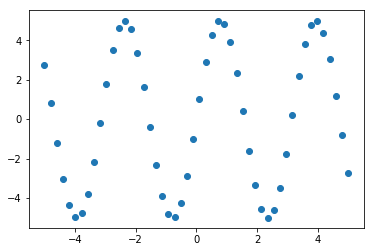

In [109]:
N = 50
x = np.linspace(-5, 5, num=N)
y = 5.0 * np.sin(x * 2)

plt.scatter(x, y)

In [ ]:
def prototype_function(x, a, b):
    return pass

best_params, best_params_cov = ...
y_fitted = prototype_function(x, best_params[0], best_params[1])
plt.scatter(x, y_fitted)

## Zadanie 5

Dane są wartości x i y dla nieznanej funkcji. Postaraj się przeprowadzić jej interpolację, tzn. wyznaczyć hipotetyczne wartości tej funkcji dla **nowych**, wartości x-ów.

In [105]:
%matplotlib inline

In [106]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.interpolate as interp

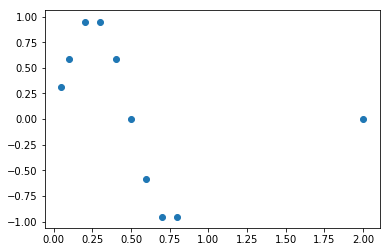

In [107]:
# To są nasze obserwacje x
x = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 2.0])
x_new = np.array([0.15, 0.25, 0.35, 0.55, 1.2, 1.5])

# To jest "zaszumiony sinus"
y = np.sin(2 * np.pi * x) 

plt.scatter(x, y)

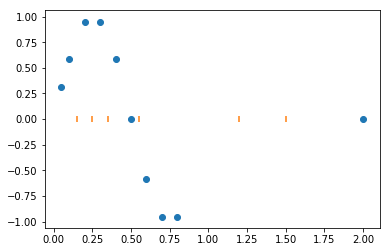

In [108]:
# Nowe wartości x, dla których nie znamy wyniku funkcji:

x_new = np.array([0.15, 0.25, 0.35, 0.55, 1.2, 1.5])
y_new_fake = np.zeros(x_new.shape)

plt.scatter(x, y)
plt.scatter(x_new, y_new_fake, marker="|")

In [ ]:
# przeprowadź interpolację wartości funkcji, dla nowych, nieznanych x-ów
f = ...


# Dokonaj interpolacji
interpolated_y = f(x_new)

# Wykres przedstawiający i stare i nowe wartości x-ów
plt.scatter(x, y)
plt.scatter(x_new, interpolated_y)
plt.show()

## Zadanie 6

Mając daną funkcję pokazaną na wykresie, znajdź jej minima za pomocą odpowiednich funkcji optymalizacyjnych.

W tym przypadku jest to funkcja nieliniowa, dlatego znajdowanie jej minimum nie jest trywialnie proste.

Odbywa się to na zasadzie **iteracyjnej minimalizacji gradientu**, która nie zawsze może prowadzić do optymalnych wyników. 

Jest to powszechnie znany problem w uczeniu maszynowym - nigdy nie jesteśmy pewni, czy nasz algorytm znalazł minumum **lokalne** czy **globalne** (prwadziwe) funkcji. 

In [ ]:
def func(x):
    return x**2 - 16 * np.sin(x) - np.random.normal(loc=10, scale=2)

np.random.seed(123)
x = np.linspace(-10, 10, num=100)
y = func(x)
plt.plot(x, y)


In [ ]:
# Znajdź minmalną wartośc funkcji, na podanych danych.
# Masz możliwość to zrobić po prostu od ręki, jednym poleceniem.
# Pamiętaj jednak, że masz PRÓBKĘ, czyli tylko "fragment" 
# wszystkich możliwych wartości. Wśród danych wartości, możliwe, że nie ma najmniejszej :)

...

empirical_min_y = 0.0
empirical_min_x = 0.0

assert np.round(empirical_min_y, 2) == -21.58
assert np.round(empirical_min_x, 2) == 1.31

In [ ]:
# Znajdź minimum funkcji za pomocą odpowiednich narzędzi analitycznych.
# następnie zbadaj tzw. "otocznie" tego punktu, czyli spróbuj wyznaczyć y dla wartości nieco powyżej i poniżej.
# Jak to się ma do Twoich poszukiwań w oparciu o próbkę?

minimum = None
minimum

## Zadanie 7

Sprawdź, czy dane, które znajdują się poniżej, pochodzą z rozkładu normalnego?
Możesz wykorzystać kilka sposobów (wiki):

* Test Shapiro-Wilka
* Test Kolmogorova-Smirnova
* Test Andersona-Darlinga
* Test Pearsona

Pamiętaj, żeby przed przystąpieniem do interpretacji wyniku znać założenia testu oraz rozumieć jego **hipotezę zerową** oraz **hipotezę alternatywną**.

Przyjmuj poziom istotności $$alpha = 0.05$$

In [ ]:
data1 = np.array([
    106.88, 91.2, 102.84, 91.95, 82.72, 96.09, 105.74, 103.39, 99.88, 123.92
])

data2 = np.array([
     0.28, 0.0, 0.11, 0.01, 0.12, 0.66, 0.13, 9.32, 0.03, 0.32   
])

def is_normal_check(data):
    return ...

is_normal1 = is_normal_check(data1)
is_normal2 = is_normal_check(data2)

assert is_normal1, "Nieprawidłowa konkluzja"
assert not is_normal2, "Nieprawidłowa konkluzja"

## Zadanie 8

Poniżej znajdują się wyniki studentów (punkty) z dwóch egazaminów:

* Pierwsza kolumna zawiera wyniki z egzaminu w połowie semestru
* Druga kolumna zawiera wyniki z egzaminu na koniec semestru

Zweryfikuj hipotezę, że wyniki na koniec semestry były **lepsze** niż w połowie semestru. 

Przyjmij, że obie próbki są od siebie ZALEŻE (to ma znacznie, przy wyborze testu statystycznego).

Przyjmij poziom istotności $$\alpha = 0.05$$

In [ ]:
results = np.array([
    [18, 22],
    [21, 25],
    [16, 17],
    [22, 24],
    [19, 16],
    [24, 29],
    [17, 20],
    [21, 23],
    [23, 19],
    [18, 20],
    [14, 15],
    [16, 15],
    [16, 18],
    [19, 26],
    [18, 18],
    [20, 24],
    [12, 18],
    [22, 25],
    [15, 19],
    [17, 16]    
])

In [ ]:
is_diff_significant = False

assert is_diff_significant, "Nieprawidłowa konkluzja"

## Zadanie 9

Tym razem nie mamy pojedynczych obserwacji, tylko zbiorcze zestawienie danych. 

Badano dwie grupy owiec, które przeszły zawał serca. Jednej grupie wstrzyknięto do serca komórki macierzyste (grupa badana: ang. **treatment**), drugą grupę pozostawiono, jako kontrolną (ang. **control**). Po pewnym czasie zbadano średni przepływ krwi w sercu.

Na podstawie podanych (**zbiorczych** informacji) należy zbadać, czy w badanej próbce, owce leczone za pomocą komórek macierzystych wykazywały lepszy przepływ krwi niż grupa kontrolna?

In [ ]:
n_treatment = 9
n_control = 9

mean_pump_treatment = 3.50
mean_pump_control = -4.33

sd_pump_treatment = 5.17
sd_pump_control = 2.76

is_significant_diff = False

assert is_significant_diff, "Nieprawidłowa konkluzja"